In [8]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib widget

#this section reads the input file
def readCSV(filename):
    df = pd.read_csv(filename)
    return df

df = readCSV("Exoplanets.csv")


#this section creates an array based on planet name, star name, x, y, z, and ESI
df_selection = df[ ["# name","star_name", "X-Coord", "Y-Coord", "Z-Coord", "ESI_Global"] ]

df2 = df_selection[df_selection["ESI_Global"] > 0.705]

df2 = df2.sort_values(by="star_name")

arr = df2.to_numpy()

#this section adds a new column: reward
def reward(ESI):
    output = 1250*(ESI**2)-1625*ESI+525.0
    return output

new_col = []
for x in arr:
    p_Reward = reward(x[5])
    new_col.append([p_Reward])

arr = np.append(arr, new_col, axis=1)


#this section combines the reward for planets in the same system
def combine_reward(array, star_name):
    new_reward = 0
    array_length = len(array)
    #p_number is our row number in the array.  if the planet in this row does not orbit the given star_name, we go to next planet
    p_number = 0
    while p_number < array_length:        
        #if the planet does orbit given star_name, we add its reward to a running total and delete that planet's row from our array
        if star_name == array[p_number][1]:
            new_reward += array[p_number][-1]
            #this records the last deleted planet before it is deleted
            recently_deleted = array[p_number]
            array = np.delete(array, p_number, axis=0)
        else:
            p_number += 1
        #once all the planets with given star_name are deleted, we add the most recently deleted planet back and replace its reward with the running reward total
        if star_name not in array:
            recently_deleted[-1] = new_reward
            array = np.append(array, [recently_deleted], axis=0)
            break
    return array

#four of our stars have more than 1 planet: TRAPPIST-1, "LHS 1140", "TOI-700", "K2-239"
arr = combine_reward(arr, "TRAPPIST-1")
arr = combine_reward(arr, "LHS 1140")
arr = combine_reward(arr, "TOI-700")
final = combine_reward(arr, "K2-239")

#this sorts from lowest reward to highest reward.  idk how to flip it
final = final[final[:, 6].argsort()]

print(final[:,[1,2,3,4,6]])


[['LTT 3780' 9.216377578 -1.911602541 -19.86374892 2.1200464185161536]
 ['TOI-1266' -4.559586011 -10.16147753 -34.28639745 2.695674208040259]
 ['Kepler-538' -90.02955239 -105.8721463 72.30576693 3.3421231015290687]
 ['K2-286' -58.64106229 17.67491774 -45.53641945 6.181063125197511]
 ['TOI-712' 23.97403548 -53.40904002 -3.004075091 7.228398689743358]
 ['TOI-2257' -3.142351377 -14.36594042 -55.88878799 8.18376614700776]
 ['K2-155' 69.47714061 27.1629081 34.04560701 8.529674028118507]
 ['LHS 1140' 2.346014695 -0.6405379908 12.23056933 10.496040073545487]
 ['TOI-237' -3.906690757 2.202654809 37.845187 11.934425813438224]
 ['K2-18' 4.886134617 0.6509419478 -37.74952798 36.32242803702184]
 ['K2-239' 16.23160585 1.260737977 -46.21629054 38.56950356152595]
 ['K2-3' 6.0002435 -0.1523838694 -44.59791315 58.3047524126772]
 ['TOI-700' 12.77030686 -28.12515994 -3.845096899 65.14560122985495]
 ['GJ 273' 3.512303153 0.321237991 -1.414401893 72.35985465584531]
 ['TRAPPIST-1' -2.789038185 0.2460394977 

Text(0.5, 0.92, 'Exoplanet Positions')

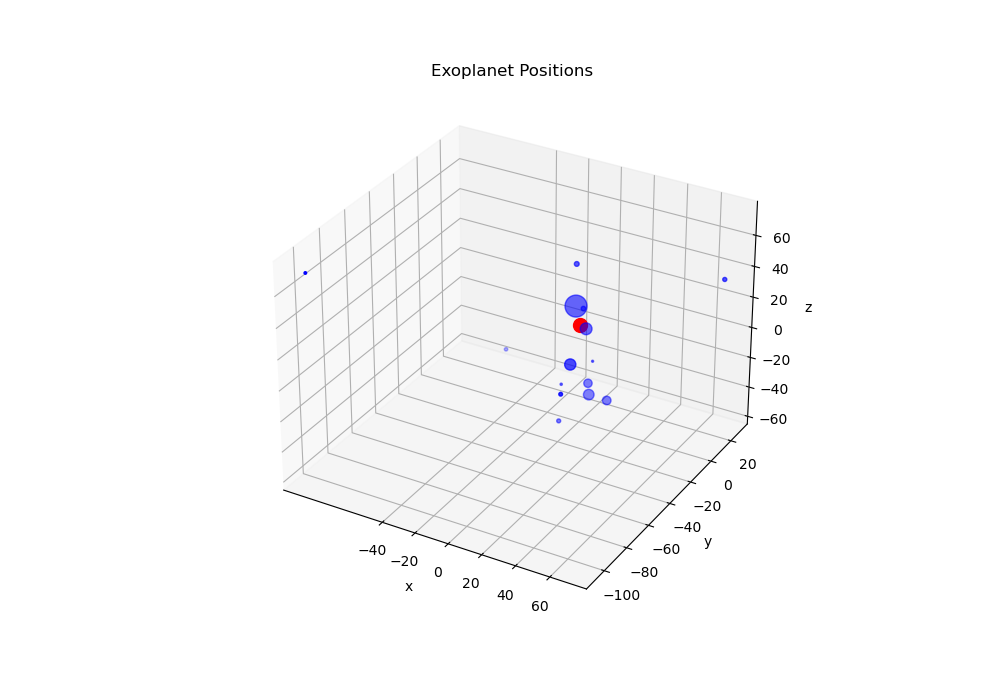

In [9]:
#creates a plot of exoplanet positions, red dot is earth, size is reward
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection = "3d")

x = []
y = []
z = []
reward_sum = []
for _ in range(len(final)):
    x.append(final[_][2])
    y.append(final[_][3])
    z.append(final[_][4])
    reward_sum.append(final[_][6])


ax.set_xticks([-40, -20, 0, 20, 40, 60, 80, 100, 120])

ax.scatter3D(x, y, z, s = reward_sum, c = "blue")
ax.scatter3D(0, 0, 0, s = 100, c = 'red')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z')
    
plt.title("Exoplanet Positions")

In [11]:
import sklearn.metrics
from numpy import savetxt

#creates an array of x,y,z positions for the planets
final_xyz = final[:, [2,3,4]]


#add earth's position
final_xyz = np.append(final_xyz, [[0, 0, 0]], axis = 0)
#finds the n by n pairwise distance matrix
p_dists_with_zeroes = sklearn.metrics.pairwise_distances(final_xyz)

#replace the distance on the return trip with infinitely high number (1000000) to make the trip back to earth undesirable
#p_dists_with_zeroes[15, 0:15] = 1000000
print(p_dists_with_zeroes)

#if you want to save the pairwise distance (pdists_with_zeroes) matrix as a csv, remove the # from the next line
savetxt('p_dists.csv', p_dists_with_zeroes, delimiter=',')

[[  0.          21.58356784 170.7418195   75.14885185  56.1606903
   40.07058963  85.9238348   32.84604626  59.32506486  18.58006273
   27.45420955  25.0043446   30.92536528  19.43966172  33.90547403
   21.981     ]
 [ 21.58356784   0.         166.81587687  61.85655966  60.52357317
   22.05332944 107.44212156  47.9808692   73.18649818  14.76899882
   26.55302271  17.83309595  39.36612569  35.43459907  47.25241815
   36.05      ]
 [170.7418195  166.81587687   0.         173.59693325 146.3583543
  179.87944665 211.19789452 152.36786455 142.42486265 180.18968868
  191.87591498 184.56668248 149.70423846 159.56746817 150.12115506
  156.65999999]
 [ 75.14885185  61.85655966 173.59693325   0.         116.99223798
   64.91452102 151.12112629  85.97618548 100.93430855  66.22806186
   76.65379284  67.06110565  94.5272296   78.17252375  81.8988662
   76.32      ]
 [ 56.1606903   60.52357317 146.3583543  116.99223798   0.
   71.10875418  99.67472269  59.02864118  74.42215873  67.03787069
   70.114

In [13]:
#ant colony optimization, ignore this box
#Best of 50 trials
from random import Random
from time import time
import math
import inspyred

final_list = []

def main(prng=None, display=1): 
    Has_Solution = False
    while Has_Solution == False:
        while display < 50:
        
            if prng is None:
                prng = Random()
                prng.seed(time()) 
        
            points_ = final_xyz
            weights_ = p_dists_with_zeroes
              
            problem = inspyred.benchmarks.TSP(weights_)
            ea = inspyred.ec.EvolutionaryComputation(prng)
            ea.selector = inspyred.ec.selectors.tournament_selection
            ea.variator = [inspyred.ec.variators.partially_matched_crossover, 
                           inspyred.ec.variators.inversion_mutation]
            ea.replacer = inspyred.ec.replacers.generational_replacement
            ea.terminator = inspyred.ec.terminators.generation_termination
            final_pop = ea.evolve(generator=problem.generator, 
                                  evaluator=problem.evaluator, 
                                    bounder=problem.bounder, 
                                  pop_size=70, 
                                  max_generations=60,
                                  tournament_size=4,
                                  num_selected=70,
                                  num_elites=1)
    
            best = max(ea.population)
            route = best.candidate
            best_stats = (route[::-1], 1/best.fitness)
            final_list.append(best_stats)
            display += 1
        
        print(final_list)
        bestest = (0, 10000000000)
        for _ in final_list:
            if _[1] < bestest[1]:
                bestest = _
        final_list.remove(bestest)
        bestest2 = (0, 10000000000)
        for _ in final_list:
            if _[1] < bestest2[1]:
                bestest2 = _
        if bestest[1] - bestest2[1] < 0.0000001:
            Has_Solution = True
            position = bestest[0].index(15)
            for _ in range(0,position):
                to_move = bestest[0][0]
                bestest[0].remove(to_move)
                bestest[0].append(to_move)
                
            print("The best path is: " + str(bestest))
    return ea,
            
if __name__ == "__main__":
    main()

[([4, 2, 8, 6, 7, 14, 15, 13, 3, 5, 10, 11, 9, 1, 0, 12], 745.5611504519647), ([6, 8, 2, 4, 12, 0, 9, 11, 10, 5, 1, 3, 13, 15, 14, 7], 746.7840145953157), ([14, 7, 15, 13, 0, 1, 9, 11, 10, 5, 3, 2, 4, 12, 6, 8], 725.5466656840781), ([5, 3, 2, 4, 12, 7, 14, 8, 6, 15, 13, 0, 1, 9, 11, 10], 740.7843386303898), ([8, 7, 14, 15, 13, 0, 9, 11, 10, 5, 1, 3, 2, 4, 12, 6], 726.7483534746), ([15, 13, 0, 9, 11, 10, 5, 1, 3, 2, 4, 12, 6, 8, 14, 7], 726.7695298274291), ([6, 7, 14, 15, 13, 0, 9, 11, 10, 5, 3, 1, 12, 4, 2, 8], 739.3531045535958), ([12, 4, 2, 8, 6, 7, 14, 15, 13, 3, 1, 5, 11, 10, 9, 0], 747.5896751771961), ([1, 0, 6, 8, 14, 7, 15, 13, 12, 4, 2, 3, 5, 10, 11, 9], 734.2484247269888), ([0, 9, 11, 10, 5, 3, 1, 12, 4, 2, 8, 6, 7, 14, 15, 13], 739.3531045535958), ([13, 0, 9, 11, 10, 5, 3, 1, 12, 4, 2, 8, 6, 7, 14, 15], 739.3531045535958), ([1, 9, 11, 10, 5, 3, 2, 4, 12, 7, 14, 8, 6, 15, 13, 0], 740.7843386303899), ([11, 9, 1, 0, 13, 15, 14, 7, 8, 6, 12, 4, 2, 3, 5, 10], 725.5254893312491), (

[-161.0943303951508, 30.059768453301675, -14.87136335003716, -293.6367868931284, -191.26134312257238, 78.1927551601488, -10.248967557168118, 226.6038627279516, 7.651667688624199, -12.741906305400919, 15.936421221422519, 52.940356376126, 19.57015418986, 41.651122042301594, 11.45558747169868, -9.096615382668599]
[(0, 0, 0), (11.45558747169868, 1.0477369819259599, -4.61315663813308), (7.651667688624199, -2.0891530892736476, 39.890735703954796), (-9.096615382668599, 0.8024725841184119, 38.3938024290732), (-12.741906305400919, 7.18409081884204, 123.43434811172), (226.6038627279516, 88.593454542636, 111.04178999953558), (78.1927551601488, -174.1967885676312, -9.797971153801958), (41.651122042301594, -91.73189665390639, -12.54101424190244), (30.059768453301675, -6.234806383623959, -64.7868089275152), (-14.87136335003716, -33.1422686527468, -111.827142467022), (15.936421221422519, 2.123086219266568, -123.12235047844881), (19.57015418986, -0.497009133080264, -145.458769613514), (52.940356376126

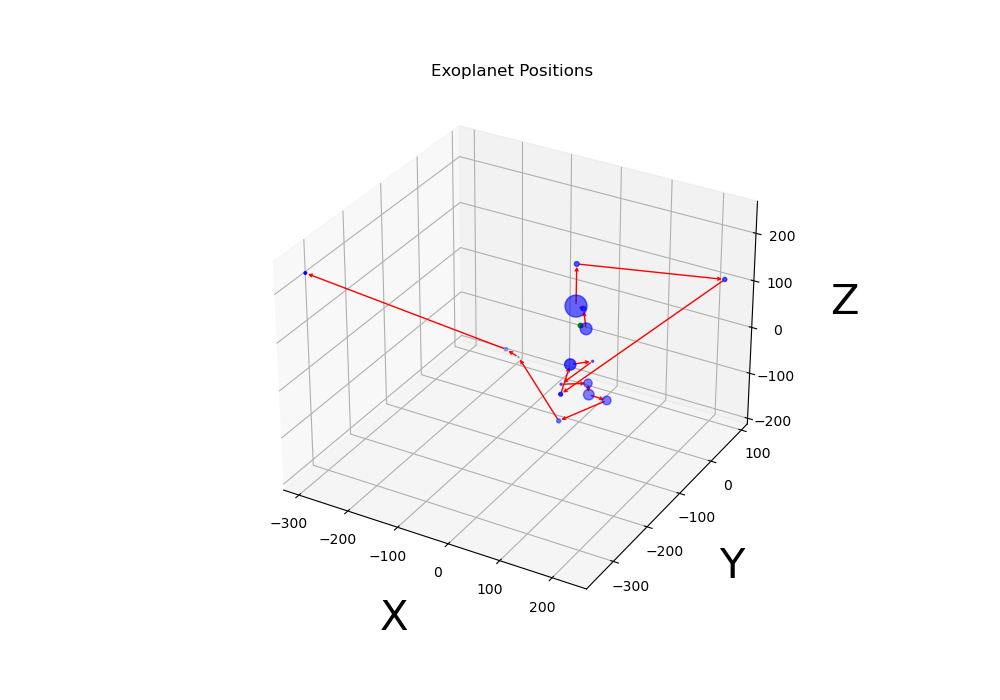

In [67]:
#plots probe path to all planets from TSP
from matplotlib.patches import FancyArrowPatch

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection = "3d")

#ax.set_xticks([-120, -60, 0, 60, 120, 180, 240, 300, 360])


x_coord = []
y_coord = []
z_coord = []
reward_sum = []
for _ in range(len(final)):
    x_coord.append(final[_][2]*3.26156)
    y_coord.append(final[_][3]*3.26156)
    z_coord.append(final[_][4]*3.26156)
    reward_sum.append(final[_][6])

print(x_coord)
    
#x,y,z have earth's position already in their list, but reward_sum does not
if 0 not in reward_sum:
    reward_sum.append(0)
if 0 not in x_coord:
    x_coord.append(0)
if 0 not in y_coord:
    y_coord.append(0)
if 0 not in z_coord:
    z_coord.append(0)
    
s = []
for x in reward_sum:
    s.append(0.5*x)
    
ax.scatter3D(x_coord, y_coord, z_coord, s = reward_sum, c = "blue")
ax.scatter3D(0, 0, 0, s = 10, c = 'green')
    
plt.title("Exoplanet Positions")

#this is the TSP route my ants found for this data
S_route = [16, 14, 8, 15, 9, 7, 5, 13, 1, 2, 10, 12, 11, 6, 0, 4, 3]

#creates a list of coordinates in order of the route
route_3 = []
for _ in S_route:
    point = (x_coord[_], y_coord[_], z_coord[_])
    route_3.append(point)

print(route_3)

#stole this from online, but this helps make arrows
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = mplot3d.proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)  


#for all planets, draw an arrow to the next planet in the route
for n in range(0,(len(route_3)-1)):
    arw = Arrow3D([route_3[n][0],route_3[n+1][0]],[route_3[n][1],route_3[n+1][1]],[route_3[n][2],route_3[n+1][2]], arrowstyle="->", color="red", lw = 1, mutation_scale=5)
    ax.add_artist(arw)

ax.set_xlabel('X', fontsize=30, labelpad=20)
ax.set_ylabel('Y', fontsize=30, labelpad=20)
ax.set_zlabel('Z', fontsize=30, labelpad=20)

plt.show()
plt.savefig("Exoplanet_position.png", format='png', dpi=300)

In [6]:
#show the list of reward values

re = final[:, [6]]
re = np.append(re, 0)

print(re)

[0.49859982122313795 2.1200464185161536 2.695674208040259
 3.3421231015290687 6.181063125197511 7.228398689743358 8.18376614700776
 8.529674028118507 10.849309808926819 11.934425813438224 36.32242803702184
 38.56950356152595 58.3047524126772 65.7265959287223 72.35985465584531
 249.92424286491314 0]


In [58]:
#n_planet = number of planets, just a number I wanted
n_planets = len(re)

#enum stands for enumerate, which is just a list of integers [0,1,2,...,15,16,17] that correspond to the planets
enum = []
for x in range(0,n_planets):
    int(x)
    enum.append(x)

#reward is a n by n matrix of rewards, where the values represent the reward earned by going from the planet in
#column A to row B.  All the values in the rows are the same because whenever you visit a new planet, the reward
#is not dependent on the planet you came from

reward = []
for x in enum:
    reward2 = []
    for _ in re:
        reward2.append(_)
    reward2[x] = 0
    reward.append(reward2)
#print(reward)
reward = np.transpose(reward)

#distances in matrix are in parsecs, convert to ly
dists_ly = p_dists_with_zeroes*3.26156

#for each position in the reward matrix, subtract the distance from the planet in column A to get to that planet.
score = reward - dists_ly

print("this is reward")
print(reward)
print('\n')
print("this is dists")
print(dists_ly)
print('\n')
print("this is score")
print(score)
savetxt('reward.csv', reward, delimiter=',')

this is reward
[[  0.           0.49859982   0.49859982   0.49859982   0.49859982
    0.49859982   0.49859982   0.49859982   0.49859982   0.49859982
    0.49859982   0.49859982   0.49859982   0.49859982   0.49859982
    0.49859982   0.49859982]
 [  2.12004642   0.           2.12004642   2.12004642   2.12004642
    2.12004642   2.12004642   2.12004642   2.12004642   2.12004642
    2.12004642   2.12004642   2.12004642   2.12004642   2.12004642
    2.12004642   2.12004642]
 [  2.69567421   2.69567421   0.           2.69567421   2.69567421
    2.69567421   2.69567421   2.69567421   2.69567421   2.69567421
    2.69567421   2.69567421   2.69567421   2.69567421   2.69567421
    2.69567421   2.69567421]
 [  3.3421231    3.3421231    3.3421231    0.           3.3421231
    3.3421231    3.3421231    3.3421231    3.3421231    3.3421231
    3.3421231    3.3421231    3.3421231    3.3421231    3.3421231
    3.3421231    3.3421231 ]
 [  6.18106313   6.18106313   6.18106313   6.18106313   0.
    6.181

In [24]:
from itertools import permutations

#creates a sublist of length = size from list l
def sub_lists (l, size):
    comb = [list(j) for j in permutations(l, size)]
    return comb

#sorts a set of tuples by their second value
def Sort_Tuple(tup):
    tup.sort(key = lambda x: x[1], reverse = True)
    return tup

#outputs a list of profitable subpaths of a given size, based on number of planets, the score matrix
def Profitable_Subpaths(n_planets, score, size, minprofit = 0):
    
    enum = []

    for x in range(0,n_planets):
        int(x)
        enum.append(x)
    #create a list of all possible subpaths of the list [0,1,2,...,14,15,16] with length = size
    sub_paths = sub_lists(enum, size)
    
    #create a list for profitable subpaths
    good_subpaths = []
    
    #for each subpath
    for x in sub_paths:
        profit = 0
        #for each trip from planet A to planet B in the subpath, add the profit of the given trip to create a value for the
        #profit of the whole trip
        for _ in range(0,len(x)-1):
            profit += score[x[_+1]][x[_]]
            if _ == len(x)-2:
                #if the trip is profitable, add to the list of profitable subpaths a tuple containing: the route, the profit
                if profit > minprofit:
                    good_subpaths.append( (x, profit))
    #sort the list of profitable subpaths and return it as an output
    return Sort_Tuple(good_subpaths)

Length2 = Profitable_Subpaths(len(re), score, 2)
Length3 = Profitable_Subpaths(len(re), score, 3)
Length4 = Profitable_Subpaths(len(re), score, 4)
Length5 = Profitable_Subpaths(len(re), score, 5)


#print("These are the paths of length 2")
#print(Length2)
#print('\n')
#print("These are the paths of length 3")
#print(Length3)
#print('\n')
#print("These are the paths of length 4")
#print(Length4)

#This does not start with Earth but it needs to for final answer.  Earth is planet 16, so find trips that start with [16 as possible options

In [57]:
def Find_Earth_Routes(Routes_with_Profits, earth_position):
    output = []
    for x in Routes_with_Profits:
        if x[0][0] == earth_position:
            output.append(x)
    return output

EarthLength2 = FindEarthRoutes(Length2)
EarthLength3 = FindEarthRoutes(Length3)
EarthLength4 = FindEarthRoutes(Length4)

def Combined_Blocks(blocks, blocks2):
    z = []
    for x in blocks:
        for y in blocks2:
            if x[0][1] == y[0][0]:
                if len(set(x[0]).union(set(y[0]))) == len(x[0] + y[0]) -1:
                    prft = x[1] + y[1]
                    route = x[0] + y[0]
                    route.remove(route[len(x[0])])
                    pair = (route, prft)
                    if pair not in z:
                        z.append(pair)
    return Sort_Tuple(z)



blocks = Length2+Length3+Length4+Length5
blocks2 = Combined_Blocks(blocks, blocks)
earthen_blocks2 = Find_Earth_Routes(blocks2, 16)
print(earthen_blocks2)

[([16, 14, 15], 262.2241257892416), ([16, 14, 8, 15], 258.90143240484747), ([16, 14, 15, 8], 256.0115689329814), ([16, 15, 14], 235.15317777753896), ([16, 15, 8, 14], 231.8304843931448), ([16, 15, 8, 14], 230.6237072046411), ([16, 13, 14, 15], 230.0595492263169), ([16, 8, 15, 14], 228.94062092127874), ([16, 8, 14, 15], 228.29725533867105), ([16, 13, 14, 8, 15], 226.7368558419227), ([16, 13, 14, 15, 8], 223.84699237005668), ([16, 10, 12, 11, 14, 15], 219.9428084938723), ([16, 10, 12, 11, 14, 8, 15], 216.62011510947812), ([16, 10, 12, 14, 15], 215.47132513577296), ([16, 10, 12, 11, 14, 15, 8], 213.73025163761207), ([16, 14, 15, 8, 13], 212.46386425754883), ([16, 1, 10, 12, 14, 15], 212.18650813283483), ([16, 10, 12, 14, 8, 15], 212.1486317513788), ([16, 14, 15, 13], 210.76583406883606), ([16, 10, 12, 14, 15, 8], 209.25876827951274), ([16, 1, 10, 12, 14, 8, 15], 208.86381474844063), ([16, 14, 8, 15, 13], 207.44314068444186), ([16, 1, 10, 12, 14, 15, 8], 205.9739512765746), ([16, 14, 15, 9